In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')

In [3]:
sns.set_palette("viridis")

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

In [11]:
class MyRobustScaler:
    def __init__(self):
        self.median_ = None
        self.iqr_ = None
    def fit(self, X):
        self.median_ = np.median(X, axis=0)
        q1 = np.percentile(X, 25, axis=0)
        q3 = np.percentile(X, 75, axis=0)
        self.iqr_ = q3 - q1
        return self
    def transform(self, X):
        return (X - self.median_) / self.iqr_
    def fit_transform(self, X):
        return self.fit(X).self.transform(X)

In [5]:
# Generate sample data with outliers
np.random.seed(42)
X = np.random.normal(loc=0, scale=1, size=(1000, 3))
X[0] = [10, 10, 10]  # Add outliers
X[1] = [-10, -10, -10]  # Add outliers

In [12]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

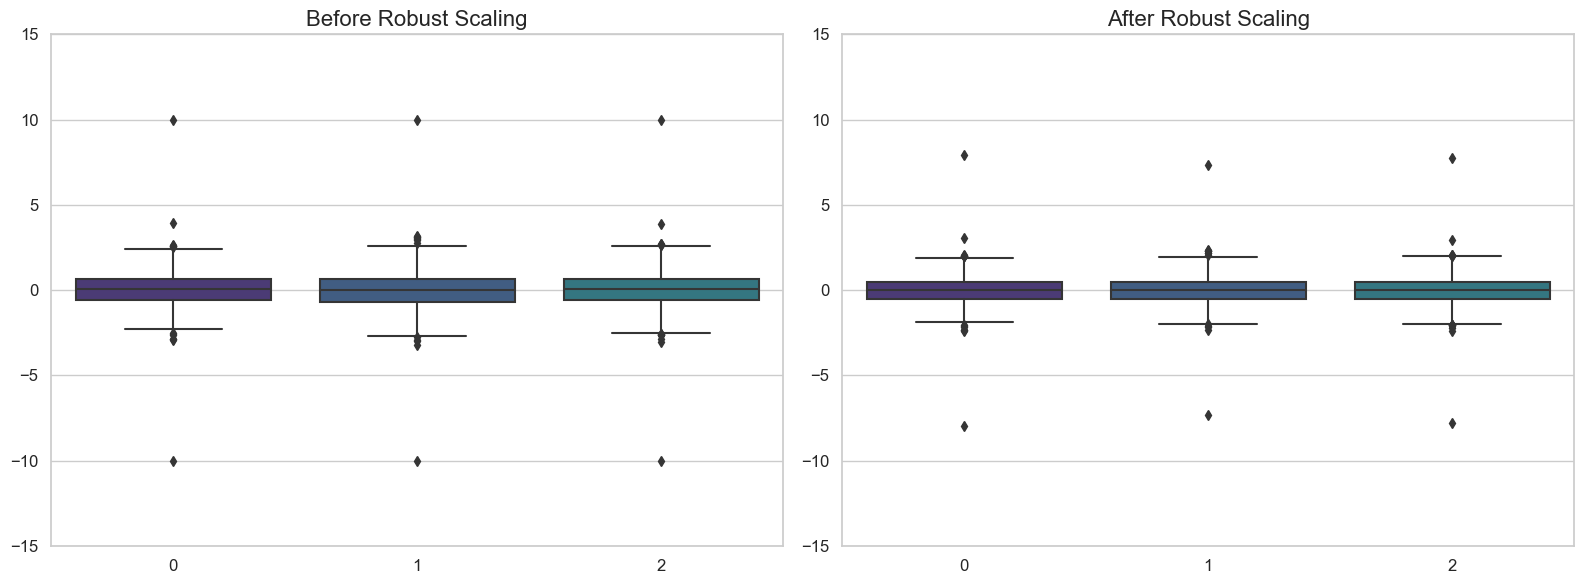

In [13]:
# Create a plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Before scaling
sns.boxplot(data=X, ax=ax1)
ax1.set_title("Before Robust Scaling")
ax1.set_ylim(-15, 15)  # Set y-axis limits for better comparison

# After scaling
sns.boxplot(data=X_scaled, ax=ax2)
ax2.set_title("After Robust Scaling")
ax2.set_ylim(-15, 15)  # Set y-axis limits for better comparison

plt.tight_layout()
plt.show()

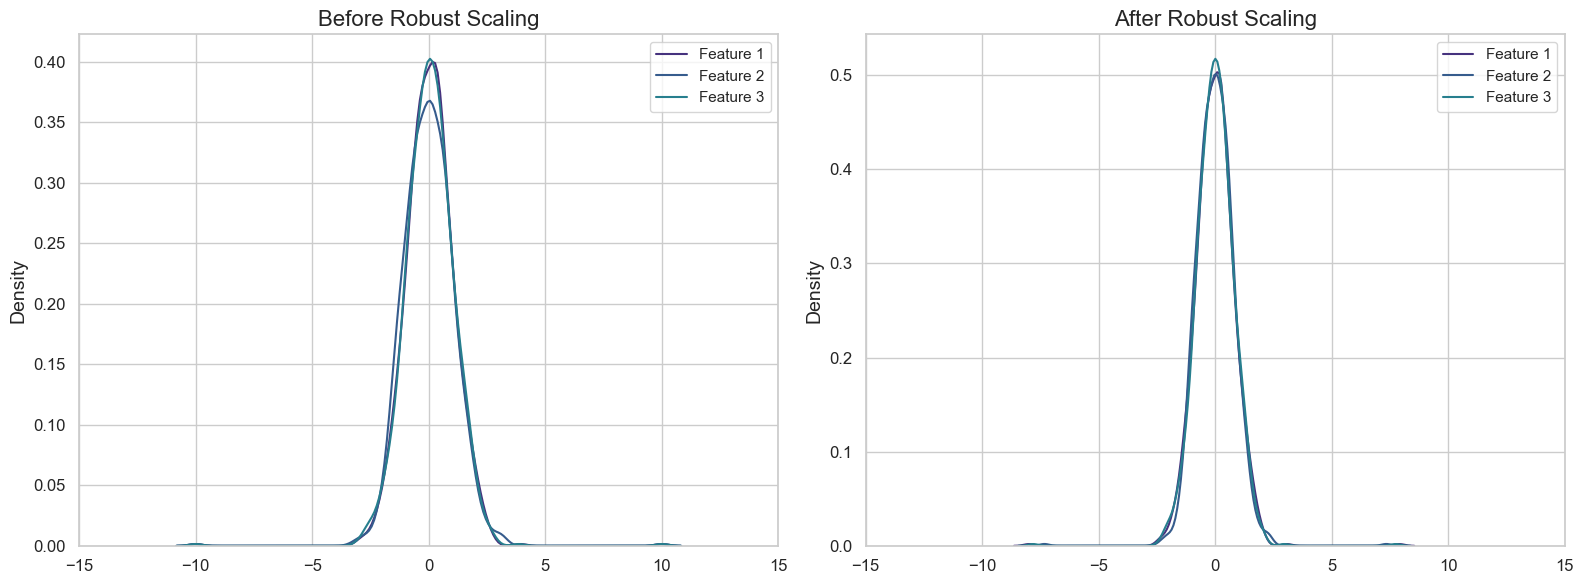

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Before scaling
for i in range(X.shape[1]):
    sns.kdeplot(X[:, i], ax=ax1, label=f'Feature {i+1}')
ax1.set_title("Before Robust Scaling")
ax1.set_xlim(-15, 15)
ax1.legend()

# After scaling
for i in range(X_scaled.shape[1]):
    sns.kdeplot(X_scaled[:, i], ax=ax2, label=f'Feature {i+1}')
ax2.set_title("After Robust Scaling")
ax2.set_xlim(-15, 15)
ax2.legend()

plt.tight_layout()
plt.show()